<a href="https://colab.research.google.com/github/mrosedata/FTW_/blob/main/Data_Preparation_and_Cleaning_(titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Goal: Clean and preprocess the raw job posting data to make it suitable for analysis.


## Data Cleaning and Preprocessing:


### A. Check the Completeness of the Dataset

In [ ]:
#importing the relevant libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset and creating a copy for comparison later
df0 = pd.read_csv("titanic.csv")
df = df0.copy()

In [ ]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
890          887         0       2   
891          888         1       1   
892          889         0       3   
893          890         1       1   
894          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
#display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#to find out how many rows and columns in the dataset
df.shape

(895, 12)

In [ ]:
#to find any null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          689
Embarked         2
dtype: int64

In [ ]:
#Detect existing non-missing values
df.notna().sum()

PassengerId    895
Survived       895
Pclass         895
Name           895
Sex            895
Age            718
SibSp          895
Parch          895
Ticket         895
Fare           895
Cabin          206
Embarked       893
dtype: int64

#### A.2 Dealing with data gaps
Now we know, there are several rows with missing data.
We have to deal with these incomplete entries.

There are some ways we can do this:
1. drop the rows (provided this is a very small subset)
2. fill the missing data

In [ ]:
#drop rows with missing values
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
875,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
876,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
883,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
891,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
#check how many rows were deleted
print(df.shape)
print(df.dropna().shape)

(895, 12)
(185, 12)


In [ ]:
#know the datatypes per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  895 non-null    int64  
 1   Survived     895 non-null    int64  
 2   Pclass       895 non-null    int64  
 3   Name         895 non-null    object 
 4   Sex          895 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        895 non-null    int64  
 7   Parch        895 non-null    int64  
 8   Ticket       895 non-null    object 
 9   Fare         895 non-null    float64
 10  Cabin        206 non-null    object 
 11  Embarked     893 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.0+ KB


In [ ]:
#by using "df.isnull().sum()", we know that Age, Cabin and Embarked columns have null values
#check the rows with missing values
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
21,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
23,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
30,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
32,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
863,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
867,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
872,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
882,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
## for numeric columns
# To insert the mean value of each column into its missing rows:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)

# For median:
# df.fillna(df.median(numeric_only=True).round(1), inplace=True)

In [ ]:
#lets now check if the age column has been filled
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          689
Embarked         2
dtype: int64

In [ ]:
#lets now check the rows with missing embarked details
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
65,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
833,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
## for text/string/object columns
# Using the mode to fill values in a column

# we know from the previous snippet that there are two missing values
# now, well fill them using the 'mode'.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

#Using the mode to fill values in text columns
# string_columns = df.select_dtypes(include=['object']).columns
# df[string_columns] = df[string_columns].fillna(df[string_columns].mode().iloc[0])

In [ ]:
#find any null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          689
Embarked         0
dtype: int64

In [ ]:
#Examine the content of a column
df.Cabin
# df.Cabin.value_counts()

0         0
1       C85
2         0
3      C123
4         0
       ... 
890       0
891     B42
892       0
893    C148
894       0
Name: Cabin, Length: 895, dtype: object

In [ ]:
# Since we know that there are a lot of NaNs in this column,
# well just have a new column that differentiates those who have declared their cabin details and not

df.Cabin.fillna(0, inplace=True) #filling the nan values with 0

Wcabin = [] #declare a list
for i in df['Cabin']: #iterate over the chosen column
    print(i)
    if i == 0: #identify null values
        Wcabin.append(0) #add '0' in the WCabin list if the value is NaN
    else:
        Wcabin.append(1)

Wcabin

0
C85
0
C123
0
0
E46
0
0
0
G6
C103
0
D56
0
A6
0
0
0
0
0
0
0
0
0
D56
0
A6
0
0
0
C23 C25 C27
0
0
0
B78
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
D33
0
B30
C52
0
0
0
0
0
B28
C83
0
0
0
F33
0
0
0
0
0
0
0
0
F G73
0
0
0
0
0
0
0
0
0
0
0
0
C23 C25 C27
0
0
0
E31
0
0
0
A5
D10 D12
0
0
0
0
D26
0
0
0
0
0
0
0
C110
0
0
0
0
0
0
0
B58 B60
0
0
0
0
E101
D26
0
0
0
F E69
0
0
0
0
0
0
0
D47
C123
0
B86
0
0
0
0
0
0
0
0
F2
0
0
C2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
E33
0
0
0
B19
0
0
0
A7
0
0
C49
0
0
0
0
0
F4
0
A32
0
0
0
0
0
0
0
F2
B4
B80
0
0
0
0
0
0
0
0
0
G6
0
0
0
A31
0
0
0
0
0
D36
0
0
D15
0
0
0
0
0
C93
0
0
0
0
0
C83
0
0
0
0
0
0
0
0
0
0
0
0
0
0
C78
0
0
D35
0
0
G6
C87
0
0
0
0
B77
0
0
0
0
E67
B94
0
0
0
0
C125
C99
0
0
0
C118
0
D7
0
0
0
0
0
0
0
0
A19
0
0
0
0
0
0
B49
D
0
0
0
0
C22 C26
C106
B58 B60
0
0
0
E101
0
C22 C26
0
C65
0
E36
C54
B57 B59 B63 B66
0
0
0
0
0
0
C7
E34
0
0
0
0
0
C32
0
D
0
B18
0
C124
C91
0
0
0
C2
E40
0
T
F2
C23 C25 C27
0
0
0
F33
0
0
0
0
0
C128
0
0
0
0
E33
0
0
0
0
0
0
0
0
0
D37
0
0
B35
E50
0
0
0
0
0
0
C82
0
0
0
0

[0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [ ]:
df['Wcabin'] = Wcabin #create a new column for Wcabin

In [ ]:
df[['Cabin','Wcabin']]  #calling 2 columns at once

,Cabin,Wcabin
0,0,0
1,C85,1
2,0,0
3,C123,1
4,0,0
...,...,...
890,0,0
891,B42,1
892,0,0
893,C148,1


#### Now, the dataset is in principle complete, now we need to check if the data types are correct

In [ ]:
#find any null values in the dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Wcabin         0
dtype: int64

### B. Scan and Correct Data Types
Now that we have a complete dataset, we will ensure each feature is in proper form so we can quantify and model in the succeeding steps of the analytics process

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Wcabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0


In [ ]:
#exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  895 non-null    int64  
 1   Survived     895 non-null    int64  
 2   Pclass       895 non-null    int64  
 3   Name         895 non-null    object 
 4   Sex          895 non-null    object 
 5   Age          895 non-null    float64
 6   SibSp        895 non-null    int64  
 7   Parch        895 non-null    int64  
 8   Ticket       895 non-null    object 
 9   Fare         895 non-null    float64
 10  Cabin        895 non-null    object 
 11  Embarked     895 non-null    object 
 12  Wcabin       895 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 91.0+ KB


The following codes can be used when you want to change the data type of a column

In [ ]:
#changing datatype of a column from float to string
df['Fare'] = df['Fare'].astype('str')

In [ ]:
#checking the datatype of a column
df['Fare'].dtype

dtype('O')

In [ ]:
#changing datatype of a column from string to float
df['Fare'] = df['Fare'].astype('float')

In [ ]:
#checking the datatype of a column
df['Fare'].dtype

dtype('float64')

In [ ]:
#changing datatype from object/string to date
# df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# df['Date'].dtype

### C. Make sure to retain the essential columns only
Each datapoint needs some memory when you are computing or modelling. Thus, we have to ensure that the necessary data are filtered through as you go along the process.

At this point, we will:
1. remove duplicates
2. examine each column for possible dropping or feature engineering

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Wcabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0


#### C.1 Removing Duplicates

In [ ]:
df.duplicated().sum() #counts the number of duplicate items

4

In [ ]:
#checking for duplicates
duplicate_rows = df.duplicated()
print(df[duplicate_rows])

    PassengerId  Survived  Pclass                          Name     Sex   Age  \
24           21         0       2          Fynney, Mr. Joseph J    male  35.0   
25           22         1       2         Beesley, Mr. Lawrence    male  34.0   
26           23         1       3   McGowan, Miss. Anna "Annie"  female  15.0   
27           24         1       1  Sloper, Mr. William Thompson    male  28.0   

    SibSp  Parch  Ticket     Fare Cabin Embarked  Wcabin  
24      0      0  239865  26.0000     0        S       0  
25      0      0  248698  13.0000   D56        S       1  
26      0      0  330923   8.0292     0        Q       0  
27      0      0  113788  35.5000    A6        S       1  


In [ ]:
#This shows both the original and duplicate rows
duplicates = df.duplicated(keep=False)
print(df[duplicates])

    PassengerId  Survived  Pclass                          Name     Sex   Age  \
12           21         0       2          Fynney, Mr. Joseph J    male  35.0   
13           22         1       2         Beesley, Mr. Lawrence    male  34.0   
14           23         1       3   McGowan, Miss. Anna "Annie"  female  15.0   
15           24         1       1  Sloper, Mr. William Thompson    male  28.0   
24           21         0       2          Fynney, Mr. Joseph J    male  35.0   
25           22         1       2         Beesley, Mr. Lawrence    male  34.0   
26           23         1       3   McGowan, Miss. Anna "Annie"  female  15.0   
27           24         1       1  Sloper, Mr. William Thompson    male  28.0   

    SibSp  Parch  Ticket     Fare Cabin Embarked  Wcabin  
12      0      0  239865  26.0000     0        S       0  
13      0      0  248698  13.0000   D56        S       1  
14      0      0  330923   8.0292     0        Q       0  
15      0      0  113788  35.5000 

In [ ]:
#dropping the duplicated rows
df= df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 894
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Wcabin       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


#### C.2 Checking each column
At this point, we will check if we will further process each column, delete it, or retain it as is.

#### Passenger ID
Since 'Passenger Id' is an id column we just need to ensure that each entry is distinct.

In [ ]:
#Since this should be distinct
df['PassengerId'].nunique() #getting number of unique values in a column

891

#### Survived
 0 means the passenger did not survive, while 1 means he/she survived.

In [ ]:
#getting counts of unique values
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Passenger Class
 refers to passenger class (1st, 2nd, 3rd), and is a proxy for socio-economic class. 1 is 1st or upper class.

In [ ]:
df.Pclass.value_counts() #getting number of people per passenger class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
#Given that analysis using this dataset will not require confidential details such as name, we can drop this
df.drop(['Name'], axis=1, inplace= True)

<ipython-input-40-1ab1f85572b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Name'], axis=1, inplace= True)


In [ ]:
df.sample()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Wcabin
173,170,0,3,male,28.0,0,0,1601,56.4958,0,S,0


#### Sex of Passenger

In [ ]:
#well retain this too
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### Age of Passenger

In [ ]:
# examine number of passengers across ages
# we can ages with decimal points
# this is because of our averaging earlier
df.Age.value_counts()

29.70    177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

<AxesSubplot:>

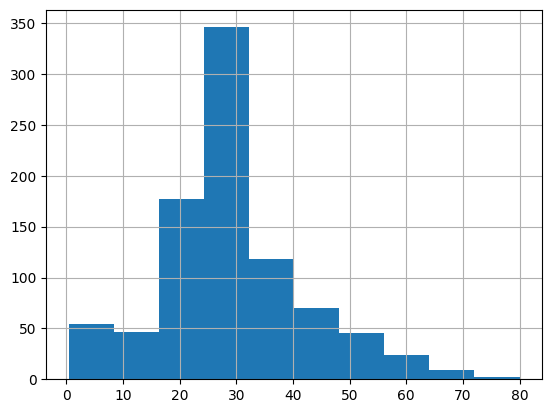

In [ ]:
df.Age.hist() # plotting the distribution of ages

Here, we can decide either to (1) round the values of ages or (2) redo the codes and account for the passenger class.
For now, we will adopt option (1).

In [ ]:
df['Age'] = df.Age.round() #rewriting the column to round of the age values

In [ ]:
df.groupby('Pclass').Age.mean().round(2) #groupby Passenger Class and get mean age

Pclass
1    37.09
2    29.88
3    26.48
Name: Age, dtype: float64

#### Siblings and Spouses
SibSp - how many siblings & spouses of the passenger aboard the Titanic.

In [ ]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<AxesSubplot:>

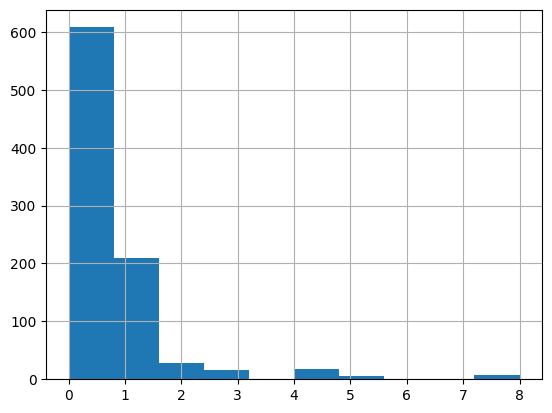

In [ ]:
df.SibSp.hist()

#### Children and Parents
Parch - how many children & parents of the passenger aboard the Titanic.

In [ ]:
df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<AxesSubplot:>

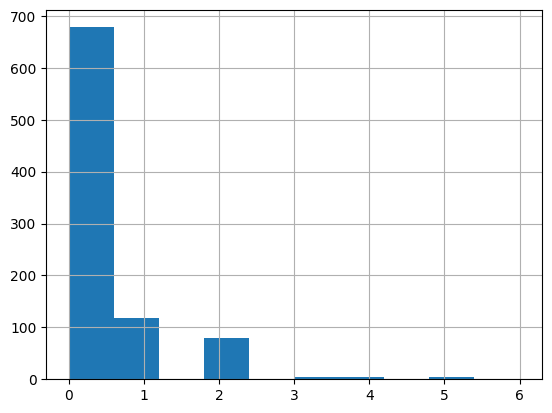

In [ ]:
df.Parch.hist()

Given that SibSp and Parch both pertains to relatives, we can create another column consolidating the number of relatives per passenger

<AxesSubplot:>

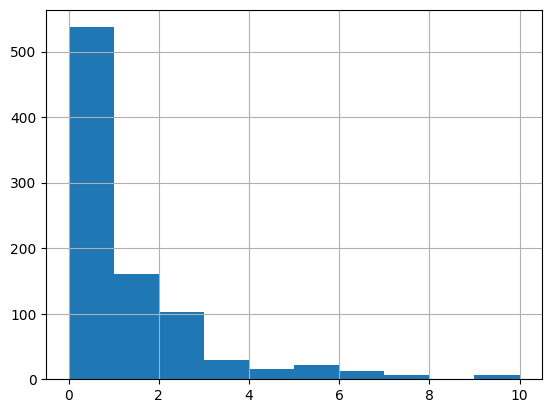

In [ ]:
df['relatives'] = df.SibSp + df.Parch #creating new column to sum up the number of relatives
df['relatives'].hist()

In [ ]:
#given that we have the sum of relatives, we can delete the SibSp and Parch
df.drop(['SibSp','Parch'], axis =1, inplace=True)

In [ ]:
df.sample()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Wcabin,relatives
882,879,0,3,male,30.0,349217,7.8958,0,S,0,0


#### Ticket
 Ticket ID so should be unique

In [ ]:
df.shape

(891, 11)

In [ ]:
df.Ticket.nunique() #here we know there are some tickets numbers that are shared

#we can then clarify this result

681

#### Fare
Price paid in pounds

<AxesSubplot:>

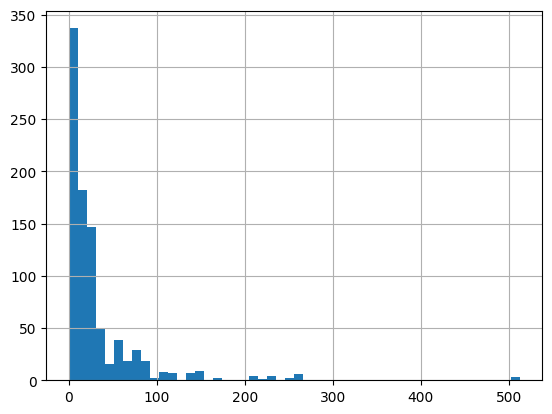

In [ ]:
df.Fare.hist(bins =50) #we can plot and see more granular results

In [ ]:
df.Fare.value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [ ]:
df.groupby('Pclass').Fare.mean() # check differences in fare for the passenger classes

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

#### Cabin
passengers cabin number

In [ ]:
#since we already derived a new column solely based on this column, we can disregard this
df.drop('Cabin', axis =1 , inplace =True)

In [ ]:
df.sample()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Wcabin,relatives
842,839,1,3,male,32.0,1601,56.4958,S,0,0


#### Port of Embarkation
where the passenger embarked the Titanic. 	C = Cherbourg, Q = Queenstown,S = Southampton

In [ ]:
df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

#### With Cabn details
 A derived column for passengers with cabin details

In [ ]:
df.Wcabin.value_counts()

Wcabin
0    687
1    204
Name: count, dtype: int64

### D. Check the created cleaned dataset

In [ ]:
df.head(3) #see the first 3 columns

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Wcabin,relatives
0,1,0,3,male,22.0,A/5 21171,7.2500,S,0,1
1,2,1,1,female,38.0,PC 17599,71.2833,C,1,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,S,0,0


In [ ]:
print(df0.shape)
print(df.shape)

(895, 12)
(891, 10)


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Wcabin         0
relatives      0
dtype: int64